In [204]:
import pandas as pd


from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [233]:
auto=pd.read_csv('./auto_insurance/train.csv').drop('id', axis=1)


In [234]:
auto.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1         28.0                   0   > 2 Years   
1    Male   76                1          3.0                   0    1-2 Year   
2    Male   47                1         28.0                   0   > 2 Years   
3    Male   21                1         11.0                   1    < 1 Year   
4  Female   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         40454.0                  26.0      217         1  
1             No         33536.0                  26.0      183         0  
2            Yes         38294.0                  26.0       27         1  
3             No         28619.0                 152.0      203         0  
4             No         27496.0                 152.0       39         0

## EDA

In [235]:
auto.shape

(381109, 11)

## Convert categorical to numerical 

In [236]:

auto['Gender'] = auto['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [237]:

auto['Vehicle_Damage'] = auto['Vehicle_Damage'].map( {'Yes': 1, 'No': 0} ).astype(int)

## Assigned dummies 

In [238]:
auto=pd.get_dummies(auto, columns=['Vehicle_Age'])

In [239]:
auto.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       1   44                1         28.0                   0   
1       1   76                1          3.0                   0   
2       1   47                1         28.0                   0   
3       1   21                1         11.0                   1   
4       0   29                1         41.0                   1   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  \
0               1         40454.0                  26.0      217         1   
1               0         33536.0                  26.0      183         0   
2               1         38294.0                  26.0       27         1   
3               0         28619.0                 152.0      203         0   
4               0         27496.0                 152.0       39         0   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  
0                     0                     0                      1  
1                     1                     0                      0  
2                     0                     0                      1  
3                     0                     1                      0  
4                     0                     1                      0

In [501]:
#auto.Region_Code.value_counts().nlargest(10)

In [240]:
#auto=auto[(auto['Region_Code']==28.0)|(auto['Region_Code']==8.0)|(auto['Region_Code']==46.0)|(auto['Region_Code']==41.0)|(auto['Region_Code']==15.0)|(auto['Region_Code']==30.0)|(auto['Region_Code']==29.0)|(auto['Region_Code']==50.0)|(auto['Region_Code']==3.0)|(auto['Region_Code']==11.0)]
auto=auto[auto['Response']==1]
auto.shape

(46710, 13)

### rename regions

In [241]:
auto.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0        1   44                1         28.0                   0   
2        1   47                1         28.0                   0   
7        0   56                1         28.0                   0   
10       0   47                1         35.0                   0   
15       1   37                1          6.0                   0   

    Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  \
0                1         40454.0                  26.0      217         1   
2                1         38294.0                  26.0       27         1   
7                1         32031.0                  26.0       72         1   
10               1         47576.0                 124.0       46         1   
15               1          2630.0                 156.0      147         1   

    Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  
0                      0                     0                      1  
2                      0                     0                      1  
7                      1                     0                      0  
10                     1                     0                      0  
15                     1                     0                      0

### Grouped by regions

In [242]:
autoAll=auto.groupby('Region_Code',as_index=False).agg('mean')


In [243]:
autoAll.head(3)

Region_Code    Gender        Age  Driving_License  Previously_Insured  \
0          0.0  0.695402  49.270115         1.000000            0.005747   
1          1.0  0.623853  44.779817         1.000000            0.009174   
2          2.0  0.651568  37.498258         0.996516            0.020906   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel     Vintage  Response  \
0        1.000000     5002.798851             59.793103  159.310345       1.0   
1        0.990826     3131.376147             94.000000  157.889908       1.0   
2        0.972125    25570.641115            117.616725  146.425087       1.0   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  
0              0.729885              0.017241               0.252874  
1              0.788991              0.110092               0.100917  
2              0.630662              0.310105               0.059233

In [244]:
#auto=auto.set_index('Region_Code')
autoAll.shape

(53, 13)

In [245]:
cols=['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
     'Policy_Sales_Channel', 'Vintage', 'Response', 'Vehicle_Age_1-2 Year','Vehicle_Age_< 1 Year','Vehicle_Age_> 2 Years']
autoX=autoAll[cols]

In [246]:
autoX.head()

Gender        Age  Driving_License  Previously_Insured  Vehicle_Damage  \
0  0.695402  49.270115         1.000000            0.005747        1.000000   
1  0.623853  44.779817         1.000000            0.009174        0.990826   
2  0.651568  37.498258         0.996516            0.020906        0.972125   
3  0.609653  40.329382         0.998307            0.006774        0.971211   
4  0.652632  40.421053         1.000000            0.003509        0.975439   

   Annual_Premium  Policy_Sales_Channel     Vintage  Response  \
0     5002.798851             59.793103  159.310345       1.0   
1     3131.376147             94.000000  157.889908       1.0   
2    25570.641115            117.616725  146.425087       1.0   
3    23189.732430            110.138865  154.568163       1.0   
4    23914.459649            113.491228  156.185965       1.0   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  
0              0.729885              0.017241               0.252874  
1              0.788991              0.110092               0.100917  
2              0.630662              0.310105               0.059233  
3              0.741744              0.210838               0.047417  
4              0.792982              0.154386               0.052632

In [219]:
df_Region=autoAll['Region_Code']
df_Region.shape

(53,)

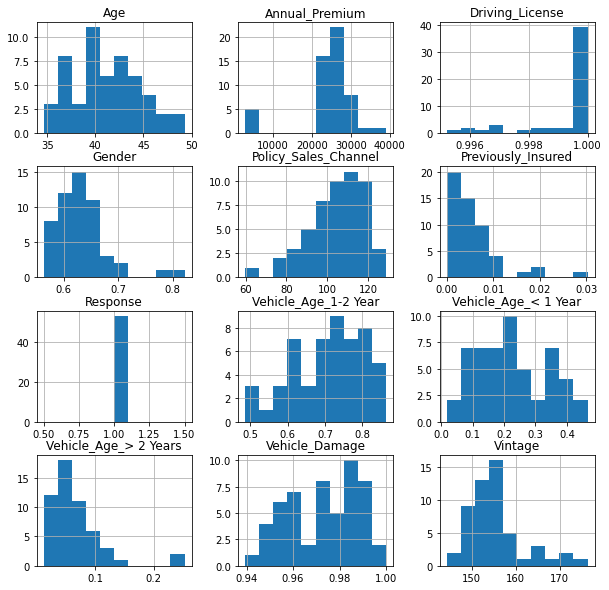

In [18]:
autoX.hist(figsize=(10, 10));

In [220]:
autoX.shape

(53, 12)

## Hopkins statistic 

- I started by checking **Hopkins statistics** in order to access the clusterability of the dataset. A score between 0 and 1, a score around 0.5 express no clusterability, and score tending to zero express high cluster tendency.

In [221]:
from pyclustertend import hopkins
hopkins(autoX, 50)

0.10019774725440783

## Outliers detection 

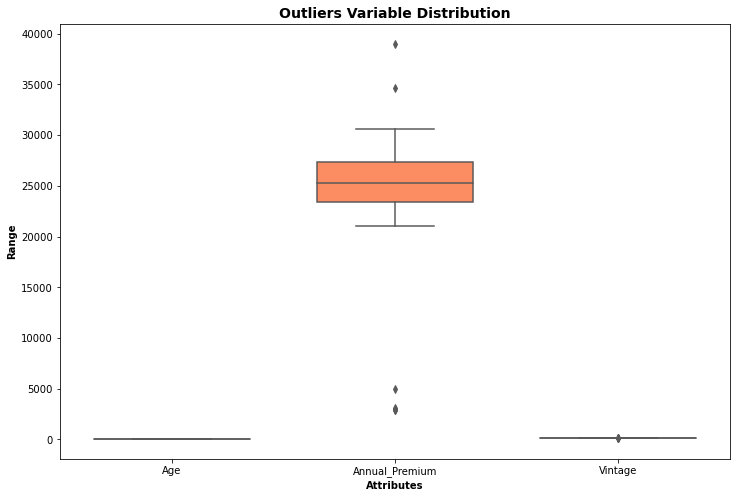

In [247]:
attributes = ['Age','Annual_Premium','Vintage']
plt.rcParams['figure.figsize'] = [12,8]
sns.boxplot(data = autoX[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold');

In [149]:
# # Removing (statistical) outliers for Annual_Premium
# cols = [ 'Annual_Premium'] # one or more

# Q1 = autoX[cols].quantile(0.25)
# Q3 = autoX[cols].quantile(0.75)
# IQR = Q3 - Q1

# autoX = autoX[~((autoX[cols] < (Q1 - 1.5 * IQR)) |(autoX[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [180]:
# attributes = ['Age','Annual_Premium','Vintage']
# plt.rcParams['figure.figsize'] = [12,8]
# sns.boxplot(data = autoX[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
# plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
# plt.ylabel("Range", fontweight = 'bold')
# plt.xlabel("Attributes", fontweight = 'bold');

## Scaling with StandardScaling

In [248]:
X=autoX.drop('Response', axis=1)


In [249]:
# set Region_Code as an index
X1=auto.groupby('Region_Code',as_index=True).agg('mean').drop('Response',axis=1)
X1.head(14)

Gender        Age  Driving_License  Previously_Insured  \
Region_Code                                                             
0.0          0.695402  49.270115         1.000000            0.005747   
1.0          0.623853  44.779817         1.000000            0.009174   
2.0          0.651568  37.498258         0.996516            0.020906   
3.0          0.609653  40.329382         0.998307            0.006774   
4.0          0.652632  40.421053         1.000000            0.003509   
5.0          0.614865  37.263514         1.000000            0.000000   
6.0          0.669704  37.403189         1.000000            0.004556   
7.0          0.587963  44.078704         1.000000            0.000000   
8.0          0.653669  44.752840         0.998158            0.003377   
9.0          0.644269  39.826087         0.996047            0.000000   
10.0         0.604563  36.878327         1.000000            0.007605   
11.0         0.631124  41.170989         1.000000            0.008646   
12.0         0.602564  40.032051         0.996795            0.003205   
13.0         0.631868  37.472527         1.000000            0.005495   

             Vehicle_Damage  Annual_Premium  Policy_Sales_Channel     Vintage  \
Region_Code                                                                     
0.0                1.000000     5002.798851             59.793103  159.310345   
1.0                0.990826     3131.376147             94.000000  157.889908   
2.0                0.972125    25570.641115            117.616725  146.425087   
3.0                0.971211    23189.732430            110.138865  154.568163   
4.0                0.975439    23914.459649            113.491228  156.185965   
5.0                0.959459    23969.162162            111.378378  164.412162   
6.0                0.952164    23539.958998            117.353075  150.794989   
7.0                0.983796    25426.125000             96.194444  150.268519   
8.0                0.983727    34686.067240             87.630949  152.875959   
9.0                0.984190    28765.581028            108.798419  147.557312   
10.0               0.961977    23569.676806            118.996198  154.509506   
11.0               0.955812    25689.235351            103.401537  156.075889   
12.0               0.964744    21878.336538            110.458333  153.858974   
13.0               0.978022    24143.667582            108.843407  153.804945   

             Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  
Region_Code                                                                     
0.0                      0.729885              0.017241               0.252874  
1.0                      0.788991              0.110092               0.100917  
2.0                      0.630662              0.310105               0.059233  
3.0                      0.741744              0.210838               0.047417  
4.0                      0.792982              0.154386               0.052632  
5.0                      0.506757              0.412162               0.081081  
6.0                      0.608200              0.366743               0.025057  
7.0                      0.831019              0.106481               0.062500  
8.0                      0.790298              0.112680               0.097022  
9.0                      0.656126              0.276680               0.067194  
10.0                     0.589354              0.357414               0.053232  
11.0                     0.752161              0.204611               0.043228  
12.0                     0.717949              0.250000               0.032051  
13.0                     0.620879              0.343407               0.035714

In [250]:
# auto['Region_Code'] = auto['Region_Code'].replace(to_replace=[8,15,28,46,41,0,1,2,3,4,5,6,7,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,39,40,42,43,44,45,47,48,49,50,51,52],
#                                                                                 value=['Alabama','Iowa','Nevada','Virginia','SDakota','NDakota','Alaska','Arizona','Arkanzas','California','Colorado','Connecticut','Delaware','Florida',
#                                                                                 'Georgia', 'Hawaii', 'Idaho','Illinois','Indiana','Kansas','Kentucky', 'Luisiana','Maine','Maryland','Massachusetts','Michigan',
#                                                                                     'Minnesota','Mississippi', 'Missouri','Monatana','Nebraska','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio',
#                                                                                      'Oklahoma','Oregon','Pennsylvania', 'Rhode Island','South Carolina','Tennessee','Texas','Utah','Vermont','Washington','West Virginia','Wisconsin','Wyoming',
#                                                                                       'Puerto Rico', 'D.C.'],inplace=True)


X1.rename({8:'NDakota', 15: 'Iowa', 0:'Alabama', 28:'Nevada', 46:'Virginia',41:'SDakota',1:'Alaska',2:'Arizona',3:'Arkanzas',4:'California',5:'Colorado',6:'Connecticut',7:'Delaware', 9:'Florida',
         10:'Georgia',11: 'Hawaii', 12:'Idaho',13:'Illinois',14:'Indiana',16:'Kansas',17:'Kentucky',18:'Luisiana',19:'Maine',20:'Maryland',21:'Massachusetts',22:'Michigan',23:'Minnesota',24:'Mississippi',25:'Missouri',26:'Monatana',27:'Nebraska',
         29:'New Hampshire',30:'New Jersey',31:'New Mexico',32:'New York',33:'North Carolina',34:'North Dakota',35:'Ohio',36:'Oklahoma',37:'Oregon',38:'Pennsylvania', 39:'Rhode Island',40:'South Carolina',
         42:'Tennessee',43:'Texas',44:'Utah',45:'Vermont',47:'Washington',48:'West Virginia',49:'Wisconsin',50:'Wyoming', 51:'Puerto Rico', 52:'D.C.'}, axis='index',inplace=True)

In [251]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
scaled_X.shape

(53, 11)

In [252]:
X1 = pd.DataFrame(scale(X1), index=X1.index, columns=X1.columns)

## PCA

In [178]:
pca_auto_1=PCA().fit(scaled_X)

## Scree plot

(-2.082471200097811, 46.64942400195622)

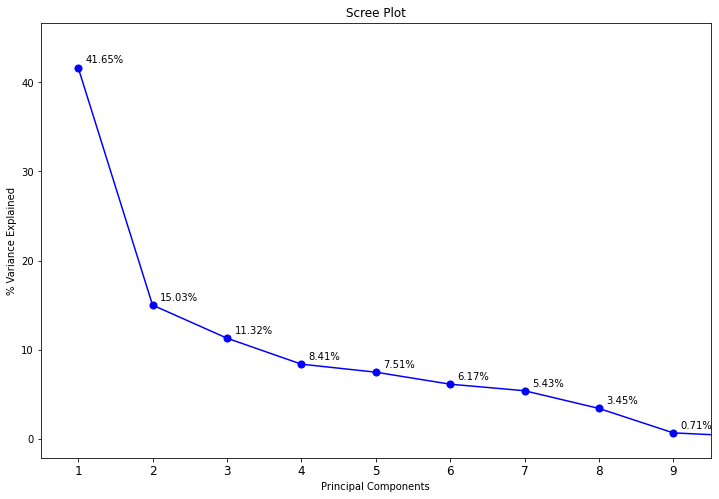

In [179]:
import numpy as np
fig, ax = plt.subplots(figsize=(12, 8))

num_components = pca_auto_1.n_components_
idx = np.arange(num_components)
vals = pca_auto_1.explained_variance_ratio_*100

ax.plot(idx, vals, color='blue')
ax.scatter(idx, vals, color='blue', s=50)

for i in range(9):
    ax.annotate(r"{:2.2f}%".format(vals[i]), (idx[i]+0.1, vals[i]+0.5))

ax.set_title('Scree Plot')
ax.set_xlabel('Principal Components')
ax.set_ylabel('% Variance Explained')

ax.set_xticklabels(idx+1, fontsize=12)
ax.set_xticks(np.arange(9))
ax.set_xlim(left=0-0.5, right=8+0.5)
ax.set_ylim(top=max(vals)+5)
#plt.savefig('./images/PCA__scree-1',dsi=100)


In [180]:
# Creates  PCA models with only three the first  principal components.
pca = PCA(n_components=3) #pca object
X_pca = pca.fit_transform(scaled_X) # from 11 features to 3 PCA features


In [181]:
# Changes PC arrays into dataframes.
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2','PC3'])
df.head()

PC1       PC2       PC3
0  5.944859  2.149066  0.667665
1  2.426677  0.654637  1.651000
2 -1.966457 -1.282431  2.699027
3 -0.437731 -0.845176  0.456842
4  0.258976 -0.039151  0.049686

In [182]:
evr = pca.explained_variance_ratio_
print(evr)
print("The 2 principal components explain {0:0.1f}%"
      " of the variance in the original data.".format(evr.sum()*100))

[0.41649424 0.15029618 0.11323267]
The 2 principal components explain 68.0% of the variance in the original data.


### Loadings. Dataset X1 with Region_Code set as index

In [253]:
# The loading vectors
pca_loadings = pd.DataFrame(PCA(n_components=3).fit(X1).components_.T, index=X1.columns, columns=['V1','V2','V3'])
pca_loadings

V1        V2        V3
Gender                 0.201001  0.295969  0.307419
Age                    0.451641 -0.041041 -0.051156
Driving_License       -0.004458  0.498702 -0.292266
Previously_Insured    -0.124227  0.163750  0.676103
Vehicle_Damage         0.293807 -0.051734  0.288999
Annual_Premium        -0.135221 -0.113513 -0.462526
Policy_Sales_Channel  -0.434813 -0.050098  0.130784
Vintage                0.027721  0.677597 -0.025422
Vehicle_Age_1-2 Year   0.363223 -0.271390  0.078425
Vehicle_Age_< 1 Year  -0.442721  0.116930  0.015365
Vehicle_Age_> 2 Years  0.343215  0.265830 -0.196860

In [254]:
# Fit the PCA model and transform X1 to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X1), columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'], index=X1.index)
df_plot

PC1       PC2       PC3       PC4       PC5       PC6  \
Region_Code                                                                  
Alabama         5.944859  2.149066  0.667665  0.480157  2.449510 -0.491196   
Alaska          2.426677  0.654637  1.651000  2.057563  0.927912  0.013292   
Arizona        -1.966457 -1.282431  2.699027 -1.577830  0.772888  0.636117   
Arkanzas       -0.437731 -0.845176  0.456842  0.043685 -0.010041  0.382767   
California      0.258976 -0.039151  0.049686  0.403252 -1.182512 -0.251483   
Colorado       -2.377306  1.868110 -1.262124 -0.148719  1.094756 -0.822079   
Connecticut    -2.444933  0.228766 -0.033252  0.261632 -0.740379 -0.978536   
Delaware        1.610085 -1.334880 -0.956418  0.891854 -0.310534  0.176177   
NDakota         2.116237 -1.040709 -0.564769 -1.607407 -0.272159  0.346931   
Florida        -0.481938 -2.135555  0.179633 -1.808140  0.872140 -1.294243   
Georgia        -2.543029  0.464526 -0.061891  0.404634  0.488246 -0.133074   
Hawaii         -0.362439  0.139562 -0.073798  0.413548 -0.963986  0.953723   
Idaho          -0.903014 -1.593744  0.356136 -0.236813  0.328557  0.054097   
Illinois       -1.624483  0.266348  0.138745  0.065630  0.170153 -0.935532   
Indiana        -1.056751  0.205506  0.210202  0.698958 -1.200277  0.948774   
Iowa           -1.186948  0.009010 -1.152853  0.269687 -0.319492 -0.080437   
Kansas         -2.415857  0.303358 -0.936246  0.579056  0.917079 -1.145800   
Kentucky        0.234258 -0.311287 -0.841974  0.587638 -1.686561  1.522471   
Luisiana       -0.553445  0.188281 -0.195088  0.453525 -1.338348  0.124321   
Maine           1.583227 -0.085579 -0.260726  0.088408  0.007524  1.043898   
Maryland        3.215540  0.924554  1.253895  1.831153  0.554628 -0.565238   
Massachusetts  -2.583821 -0.346730 -0.872646  1.037709  0.446610 -0.034041   
Michigan        1.500132  1.585026  0.645014 -0.947633  0.455191  0.367323   
Minnesota      -0.238943 -0.212496  0.774139  0.185620 -1.651922 -0.862000   
Mississippi     0.507521 -1.998699  0.320511 -0.666144  0.086239 -0.030953   
Missouri       -0.721771  0.537238  1.909144 -0.185568  0.388686  0.405365   
Monatana        0.562821 -0.837896 -1.110637 -0.015602  0.623574 -0.660353   
Nebraska       -3.232748 -2.642679  1.087886 -0.907874  1.524723  0.224154   
Nevada          2.703940 -0.631358 -2.038196 -1.423719  1.032451  1.170193   
New Hampshire   0.844522 -1.573795  0.342241 -0.936132 -0.497711  0.360772   
New Jersey     -2.369020  0.498782 -0.520685  0.502376 -0.590233 -0.616969   
New Mexico      1.946842 -0.655172  1.313030  2.701540 -0.003117 -0.456170   
New York       -3.520410  0.170159 -1.204183  0.694428 -0.112503 -0.640930   
North Carolina  0.953875 -0.572928 -0.142312 -0.305854 -0.111420  0.064005   
North Dakota   -2.279135  0.847716 -1.418160  0.533624  0.425378  0.131337   
Ohio            0.950734 -0.897655 -0.663341  0.619595 -0.662881  0.104543   
Oklahoma       -1.263857  0.365674 -0.083875  0.157875 -0.795444  0.291380   
Oregon         -4.112229  0.673669  0.412876 -0.017936  1.409695  0.739412   
Pennsylvania    1.401188 -0.555299  0.030415  0.732696 -1.785636  1.215390   
Rhode Island    0.566632 -0.010083 -0.473339  0.397027 -0.480888  0.356849   
South Carolina  0.229629 -0.681650 -0.875068  0.406445  0.946006 -0.753958   
SDakota         0.253851 -0.323152 -0.698866 -0.527721 -0.474040  0.198142   
Tennessee       1.392561  2.384189 -0.168259 -1.453889 -1.020601 -1.773843   
Texas           2.038090 -1.753989  1.578272 -1.638405  0.134943  0.252395   
Utah           -2.891833  3.690480  3.437154 -0.742666 -0.397895  1.891468   
Vermont        -0.102562  0.162467  0.497747  0.041830 -0.358797 -0.181978   
Virginia        0.925377 -1.427920 -0.306336  0.142141  0.056335  0.106731   
Washington     -0.290909 -0.544550 -0.632507 -0.179588 -0.108887 -0.903373   
West Virginia   3.973896 -0.572463  1.388552  1.263478  0.784547 -0.602448   
Wisconsin      -3.953306  1.938385 -0.13167

### Bi plot displays both PC scores and vectors

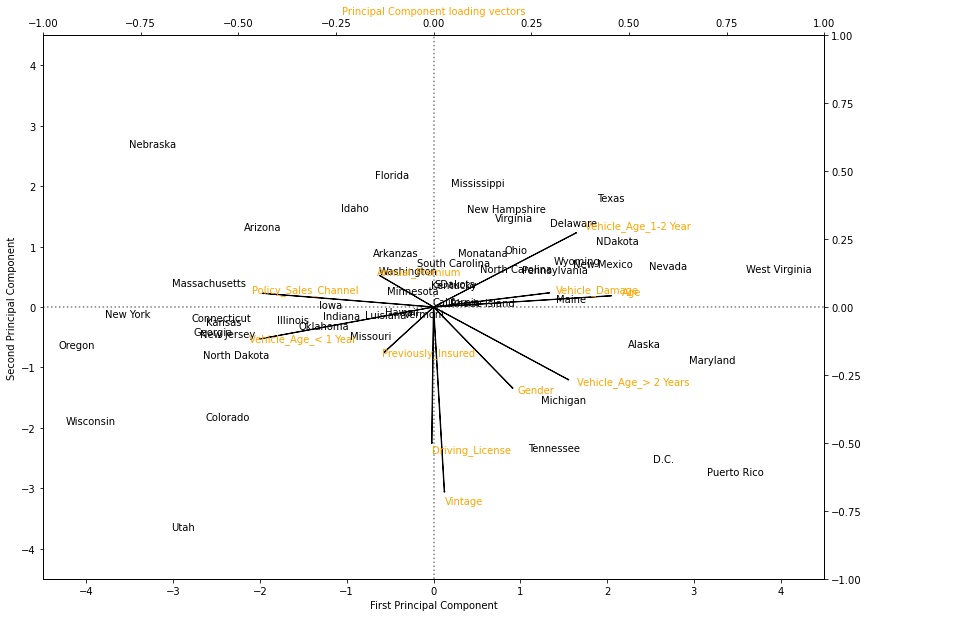

In [256]:
fig , ax1 = plt.subplots(figsize=(14,10))

ax1.set_xlim(-4.5,4.5)
ax1.set_ylim(-4.5,4.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-4.5,4.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-4.5,4.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3])
ax2.arrow(0,0,pca_loadings.V1[4], -pca_loadings.V2[4])
ax2.arrow(0,0,pca_loadings.V1[5], -pca_loadings.V2[5])
ax2.arrow(0,0,pca_loadings.V1[6], -pca_loadings.V2[6])
ax2.arrow(0,0,pca_loadings.V1[7], -pca_loadings.V2[7])
ax2.arrow(0,0,pca_loadings.V1[8], -pca_loadings.V2[8])
ax2.arrow(0,0,pca_loadings.V1[9], -pca_loadings.V2[9])
ax2.arrow(0,0,pca_loadings.V1[10], -pca_loadings.V2[10])
#plt.savefig('./images/Bi_plot',dsi=100);

## Silhouette_scores 
**is a method of validation and interpretation of consistency within clusters of data.**


In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [82]:
sc=[]
K=range(2,5)
for k in K:
    kmeans=KMeans(n_clusters=k).fit(X_pca)
    score = silhouette_score(df, kmeans.labels_)
    sc.append(score)
    

''

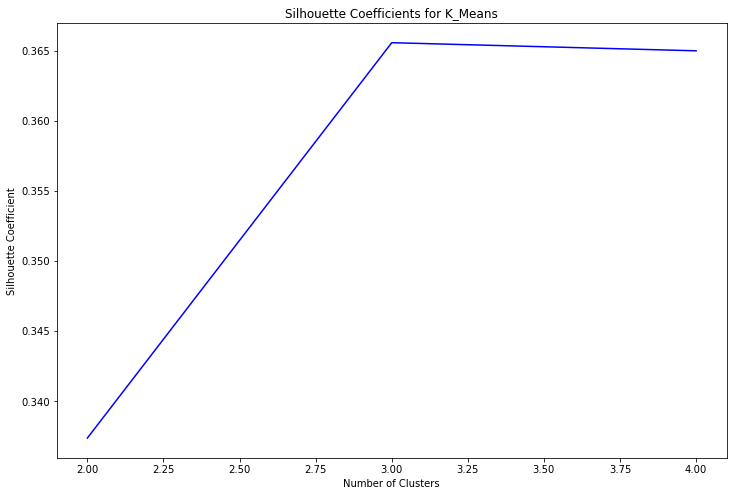

In [83]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(range(2, 5), sc, color='blue')

ax.set_title('Silhouette Coefficients for K_Means')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Coefficient')
# plt.savefig('../imgs/sil-coef-1.png')
;

In [84]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.cluster import KMeans

In [85]:
kmeans_model_3 = KMeans(n_clusters=3, random_state=1).fit(X_pca)# score for 3 clasters
labels = kmeans_model_3.labels_
metrics.silhouette_score(X_pca, labels)

0.3655643820656865

**Clustering K=3** 

- The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.


In [86]:
km3 = KMeans(n_clusters=3, n_init=20)
km3.fit(X_pca)

KMeans(n_clusters=3, n_init=20)

In [87]:
km3.labels_

array([2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2,
       0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 1], dtype=int32)

In [88]:
pd.Series(km3.labels_).value_counts()

1    27
0    18
2     8
dtype: int64

In [89]:
km3.cluster_centers_

array([[-2.36354981,  0.43310479,  0.12319121],
       [ 0.6654428 , -0.75118587, -0.17140925],
       [ 3.07211761,  1.56076655,  0.301326  ]])

In [90]:
df_km=pd.concat([df.reset_index().drop('index', axis=1), pd.Series(km3.labels_).reset_index().drop('index',axis=1)], axis=1)
df_km.columns=['PC1','PC2','PC3','ClusterID']
df_km.shape

(53, 4)

In [91]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

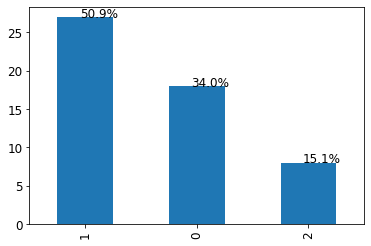

In [92]:
ax=df_km.ClusterID.value_counts().plot(kind='bar');
plt.xticks(size=12)
plt.yticks(size=12)
without_hue(ax, df_km.ClusterID)

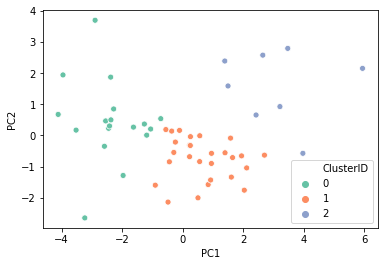

In [93]:
sns.scatterplot(x='PC1', y='PC2', hue='ClusterID', data=df_km, palette='Set2');

In [94]:
df_km.head()

PC1       PC2       PC3  ClusterID
0  5.944859  2.149066  0.667665          2
1  2.426677  0.654637  1.651000          2
2 -1.966457 -1.282431  2.699027          0
3 -0.437731 -0.845176  0.456842          1
4  0.258976 -0.039151  0.049686          1

In [95]:
# Viewing the dataset
df_temp = pd.concat([df_km,df_Region], axis = 1)
df_temp.shape

(53, 5)

In [96]:
df_temp.head()

PC1       PC2       PC3  ClusterID Region_Code
0  5.944859  2.149066  0.667665          2     Alabama
1  2.426677  0.654637  1.651000          2      Alaska
2 -1.966457 -1.282431  2.699027          0     Arizona
3 -0.437731 -0.845176  0.456842          1    Arkanzas
4  0.258976 -0.039151  0.049686          1  California

In [97]:
autoAll.shape

(53, 13)

In [98]:
# Viewing the Cluster Profiling dataset
df_ClusterProfiling = pd.merge(autoAll, df_temp[['ClusterID', 'Region_Code']], on = 'Region_Code')
df_ClusterProfiling.shape

(53, 14)

## Rename Regions

In [106]:
#df_ClusterProfiling['Region_Code'] = df_ClusterProfiling['Region_Code'].replace(to_replace=[8,15,28,46,41,0,1,2,3,4,5,6,7,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,39,40,42,43,44,45,47,48,49,50],
                                                                                #value=['Columbia','Iowa','Nevada','Virginia','SDakota','Alabama','Alaska','Arizona','Arkanzas','California','Colorado','Connecticut','Delaware','Florida',
                                                                                #'Georgia', 'Hawaii', 'Idaho','Illinois','Indiana','Kansas','Kentucky', 'Luisiana','Maine','Maryland','Massachusetts','Michigan',
                                                                                    #'Minnesota','Mississippi', 'Missouri','Monatana','Nebraska','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio',
                                                                                     #'Oklahoma','Oregon','Pennsylvania', 'Rhode Island','South Carolina','Tennessee','Texas','Utah','Vermont','Washington','West Virginia','Wisconsin','Wyoming'])



In [99]:
df_ClusterProfiling.shape

(53, 14)

## Set Clusters as Index

In [254]:
# # Clustering the numerical columns by Cluster ID
# df_ClusterProfiling.set_index('ClusterID')
# df_ClusterProfiling.shape

In [100]:
df_ClusterProfiling.head()

Region_Code    Gender        Age  Driving_License  Previously_Insured  \
0     Alabama  0.695402  49.270115         1.000000            0.005747   
1      Alaska  0.623853  44.779817         1.000000            0.009174   
2     Arizona  0.651568  37.498258         0.996516            0.020906   
3    Arkanzas  0.609653  40.329382         0.998307            0.006774   
4  California  0.652632  40.421053         1.000000            0.003509   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel     Vintage  Response  \
0        1.000000     5002.798851             59.793103  159.310345       1.0   
1        0.990826     3131.376147             94.000000  157.889908       1.0   
2        0.972125    25570.641115            117.616725  146.425087       1.0   
3        0.971211    23189.732430            110.138865  154.568163       1.0   
4        0.975439    23914.459649            113.491228  156.185965       1.0   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  \
0              0.729885              0.017241               0.252874   
1              0.788991              0.110092               0.100917   
2              0.630662              0.310105               0.059233   
3              0.741744              0.210838               0.047417   
4              0.792982              0.154386               0.052632   

   ClusterID  
0          2  
1          2  
2          0  
3          1  
4          1

## Ploting

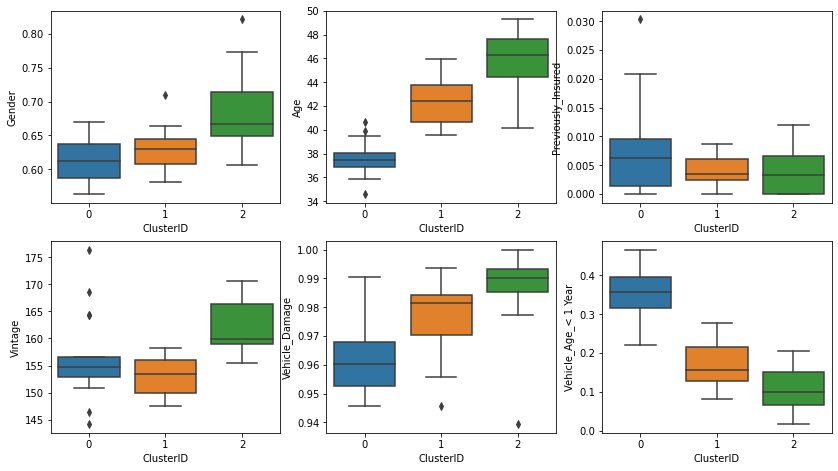

In [101]:
# Plotting the box plots to observe distribution
plt.figure(figsize = (14,12))
var = [ 'Gender', 'Age', 'Previously_Insured', 'Vintage','Vehicle_Damage','Vehicle_Age_< 1 Year']
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x= 'ClusterID', y = i[1], data = df_ClusterProfiling)
    

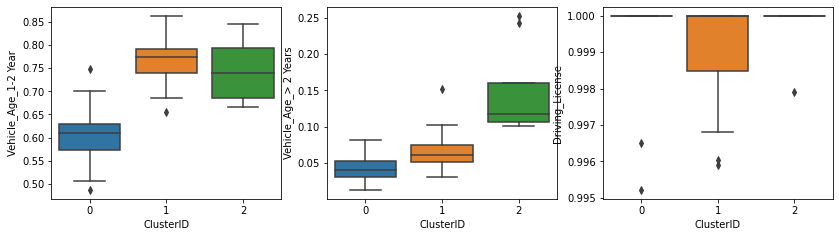

In [102]:
# Plotting the box plots to observe distribution
plt.figure(figsize = (14,12))
var = [ 'Vehicle_Age_1-2 Year', 'Vehicle_Age_> 2 Years', 'Driving_License']
for i in enumerate(var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x= 'ClusterID', y = i[1], data = df_ClusterProfiling)

In [103]:
df_ClusterProfiling[df_ClusterProfiling['ClusterID'] ==0]['Region_Code'].head()

2         Arizona
5        Colorado
7     Connecticut
11        Georgia
14       Illinois
Name: Region_Code, dtype: object

In [107]:
df_ClusterProfiling[df_ClusterProfiling['ClusterID'] ==1]['Region_Code'].head(10)

3       Arkanzas
4     California
6       Columbia
9       Delaware
10       Florida
12        Hawaii
13         Idaho
18      Kentucky
19      Luisiana
20         Maine
Name: Region_Code, dtype: object

In [105]:
df_ClusterProfiling[df_ClusterProfiling['ClusterID'] ==2]['Region_Code'].head()

0      Alabama
1       Alaska
8         D.C.
21    Maryland
23    Michigan
Name: Region_Code, dtype: object

## Hierarcical clustering

- Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

In [384]:
#df_short

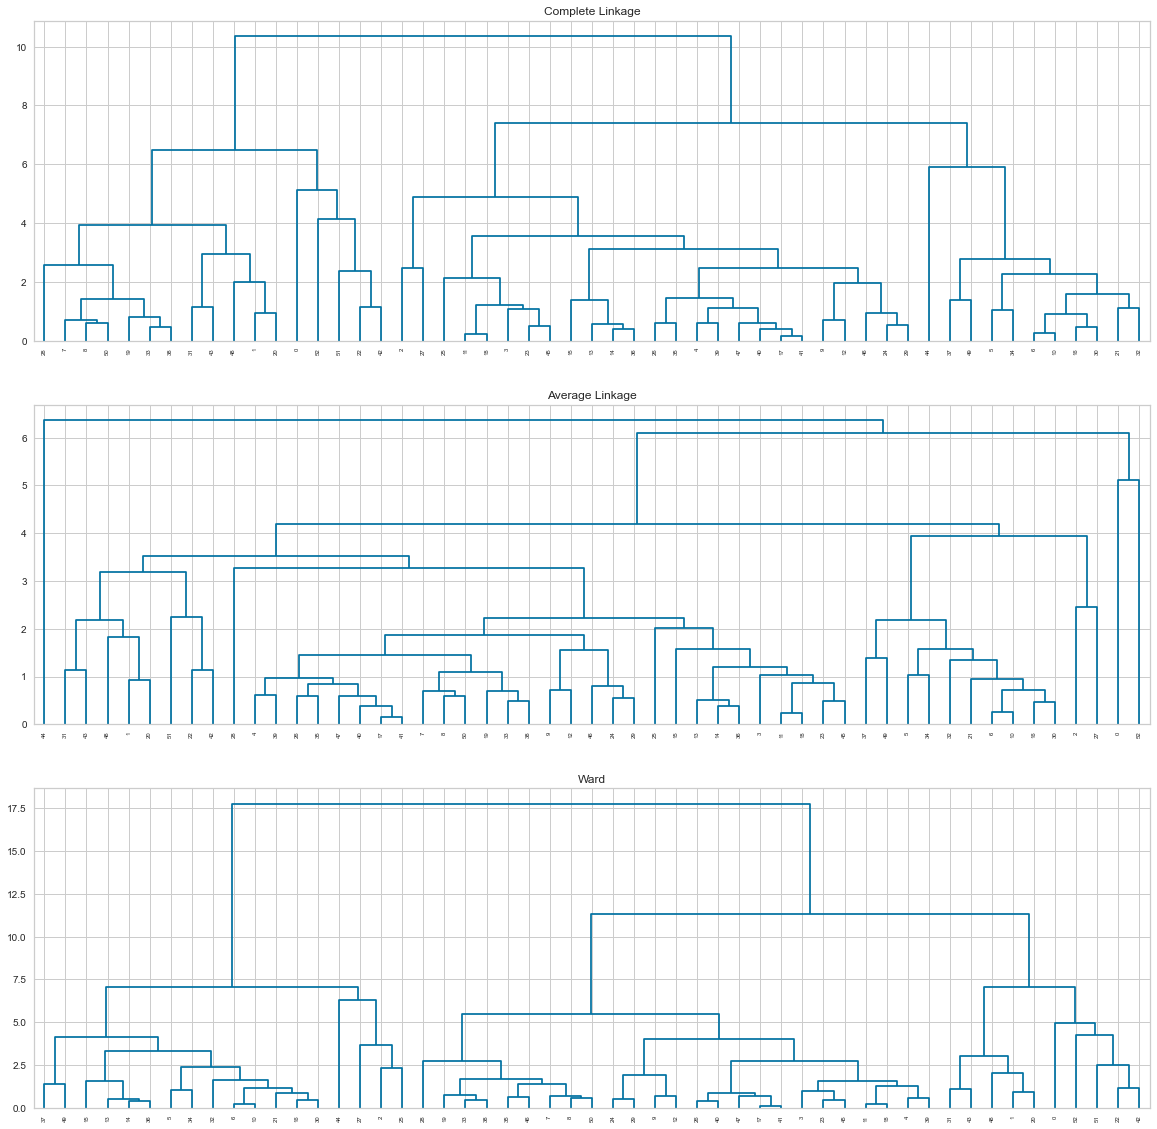

In [349]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,20))

for linkage, cluster, ax in zip([hierarchy.complete(df), hierarchy.average(df),hierarchy.ward(df)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage,ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Ward');


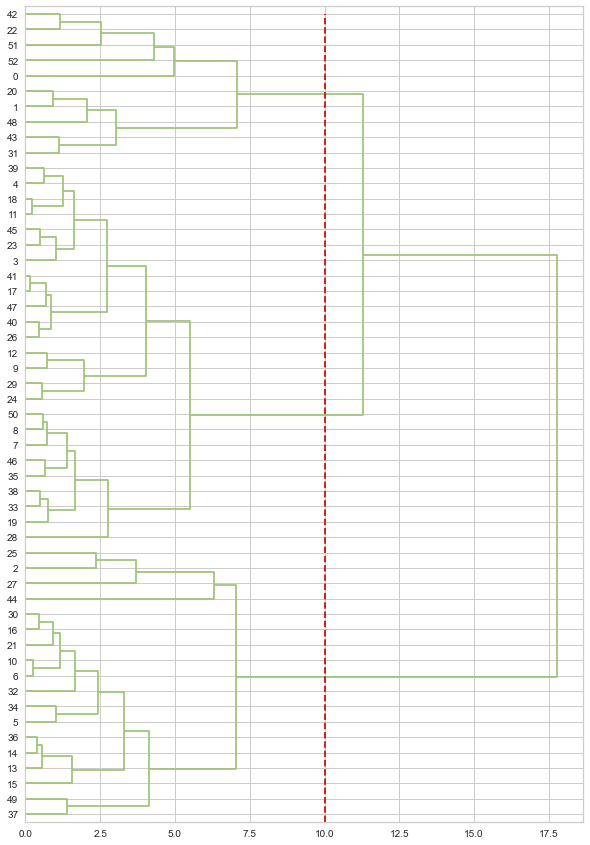

In [350]:
plt.figure(figsize=(10,15))
cut = hierarchy.dendrogram(hierarchy.ward(df),
                            orientation='right', color_threshold=40, leaf_font_size=10)
plt.vlines(10,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed');

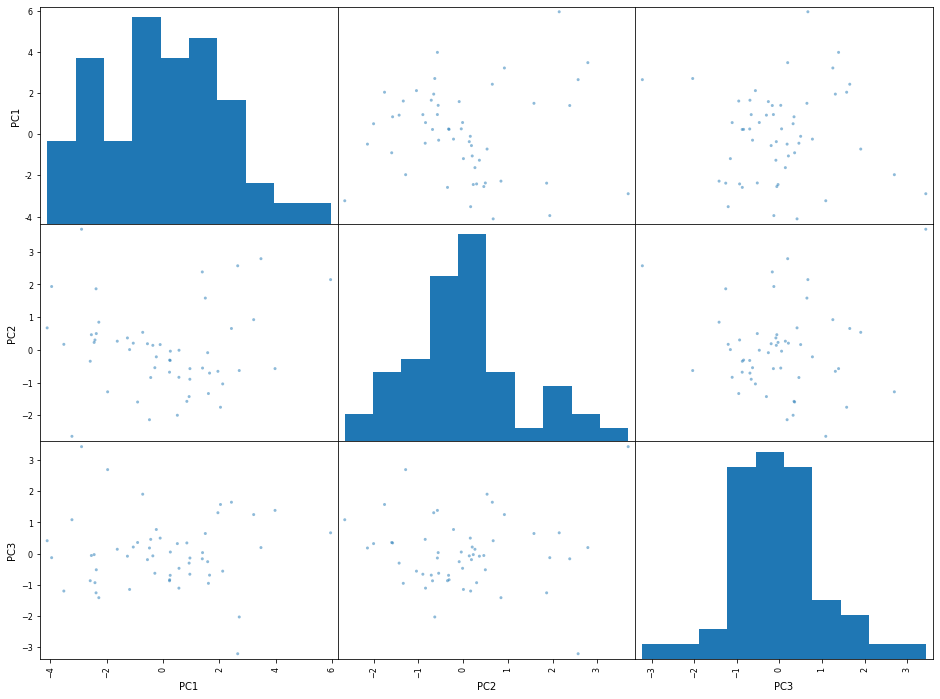

In [129]:
from pandas.plotting import scatter_matrix 
# Y=df_ClusterProfiling.copy()
# features=['Gender', 'Age','Previously_Insured','Annual_Premium', 'Vintage','Vehicle_Damage' ]
scatter_matrix(df,figsize=(16,12)) 
plt.show()